In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, f1_score, accuracy_score
import numpy as np

# Cargar datos
df = pd.read_excel("./datos/Clasificación_Robertuito_2019.xlsx")


In [2]:
true_col = 'Polarity'

robertuito_col = "Polarity_Robertuito"

In [3]:
def plot_accuracy_robertuito(df, true_col, robertuito_col, model_name):
    # Calcular porcentaje de aciertos globales
    correct = (df[robertuito_col] == df[true_col]) & (df[true_col] != "INVAL")
    total_valid = (df[true_col] != "INVAL").sum()
    global_accuracy = correct.sum() / total_valid * 100

    polarity_accuracy = {}
    for label in ["NEG", "NEU", "POS"]:
        correct = (df[robertuito_col] == df[true_col]) & (df[true_col] == label)
        total_label = (df[true_col] == label).sum()
        accuracy = correct.sum() / total_label * 100 if total_label > 0 else 0
        polarity_accuracy[label] = accuracy

    fig, ax = plt.subplots(figsize=(8, 6))
    labels = ["Global"] + list(polarity_accuracy.keys())
    accuracies = [global_accuracy] + list(polarity_accuracy.values())
    colors = ['grey', 'red', 'lightblue', 'lightgreen']

    bars = ax.bar(labels, accuracies, color=colors)
    ax.set_xlabel('Tipo de precisión')
    ax.set_ylabel('Porcentaje de aciertos (%)')
    ax.set_title(f'Porcentaje de aciertos por polaridad - {model_name}')
    ax.set_ylim(0, 100)
    ax.grid(axis='y')

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.2f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


In [4]:
def plot_confusion_matrices(df, true_col, robertuito_col):
    filtered_df = df[[true_col, robertuito_col]].dropna()

    # Generar matriz de confusión
    cm = confusion_matrix(filtered_df[true_col], filtered_df[robertuito_col], labels=["NEG", "NEU", "POS"])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NEG", "NEU", "POS"])

    # Graficar la matriz de confusión
    plt.figure(figsize=(8, 6))
    disp.plot(cmap='Blues', values_format='d')
    plt.title('Matriz de confusión - Robertuito')
    plt.tight_layout()
    plt.show()

In [5]:
def calculate_metrics(df, true_col, model_name, predicted_col, expected_labels):
    metrics_manual = []

    for label in expected_labels:
        # Verdaderos positivos
        tp = ((df[true_col] == label) & (df[predicted_col] == label)).sum()
        # Verdaderos negativos
        tn = ((df[true_col] != label) & (df[predicted_col] != label)).sum()
        # Falsos positivos
        fp = ((df[true_col] != label) & (df[predicted_col] == label)).sum()
        # Falsos negativos
        fn = ((df[true_col] == label) & (df[predicted_col] != label)).sum()

        accuracy_binaria = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 1.0
        accuracy_global = accuracy_score(df[true_col], df[predicted_col])
        precision = tp / (tp + fp) if (tp + fp) > 0 else 1.0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 1.0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

        metrics_manual.append({
            "Modelo": model_name,
            "Clase": label,
            "Accuracy Global": round(accuracy_global, 2),
            "Accuracy Binaria": round(accuracy_binaria, 2),
            "Precisión": round(precision, 2),
            "Recall": round(recall, 2),
            "F1-score": round(f1, 2)
        })

    return pd.DataFrame(metrics_manual)


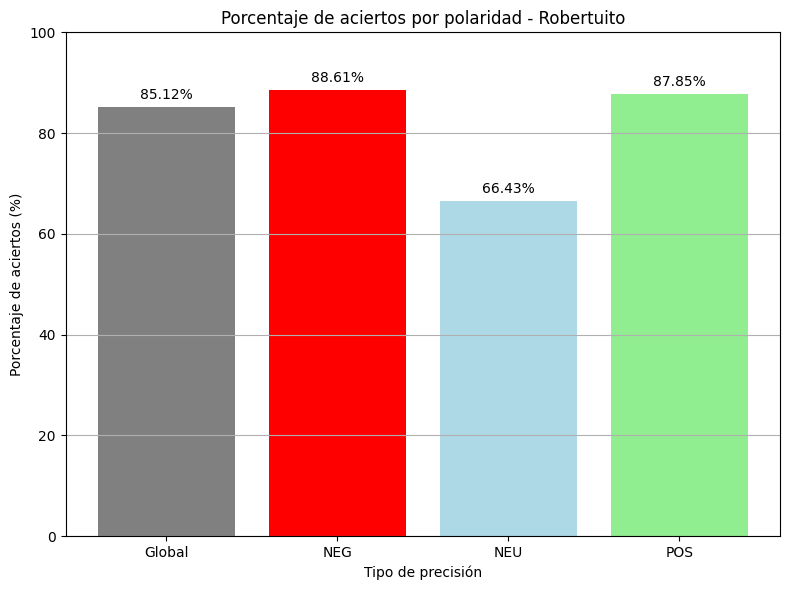

In [6]:
plot_accuracy_robertuito(df, true_col, robertuito_col, "Robertuito")

<Figure size 800x600 with 0 Axes>

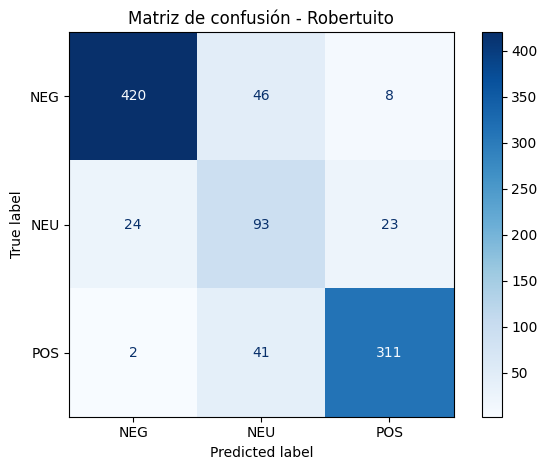

In [7]:
plot_confusion_matrices(df, true_col, robertuito_col)

In [8]:
metricas_df = calculate_metrics(df, true_col, "Robertuito", robertuito_col, ["NEG", "NEU", "POS"])
metricas_df.set_index("Clase", inplace=True)
metricas_df

,Modelo,Accuracy Global,Accuracy Binaria,Precisión,Recall,F1-score
Clase,,,,,,
NEG,Robertuito,0.85,0.92,0.94,0.89,0.91
NEU,Robertuito,0.85,0.86,0.52,0.66,0.58
POS,Robertuito,0.85,0.92,0.91,0.88,0.89
